In [73]:
import numpy as np
from matplotlib import pyplot as plt

In [74]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [75]:
target = x * np.sin(np.cos(x * 3))
target

array([ 8.36021862e-01,  7.07266523e-01,  5.37888772e-01,  3.38570924e-01,
        1.35151445e-01, -3.53391123e-02, -1.41791947e-01, -1.74703418e-01,
       -1.46955095e-01, -8.16508053e-02, -1.86844092e-16,  8.16508053e-02,
        1.46955095e-01,  1.74703418e-01,  1.41791947e-01,  3.53391123e-02,
       -1.35151445e-01, -3.38570924e-01, -5.37888772e-01, -7.07266523e-01])

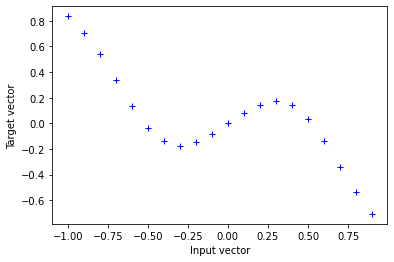

In [76]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, target, 'b+')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [77]:
x1 = np.arange(-3, 3, 0.1)
# RBF function (radial basis transfer)
def rbf(x):
    return np.exp(-x ** 2)

a = rbf(x1)


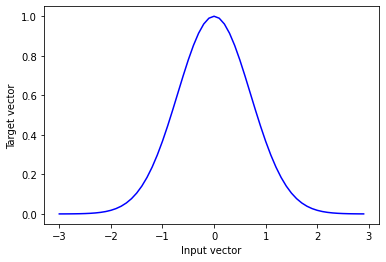

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, a, 'b')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [79]:
a1 = rbf(x1)
a2 = rbf(x1 - 1.5)
a3 = .5 * rbf(x1 + 2)
a4 = a1 + a2 + a3

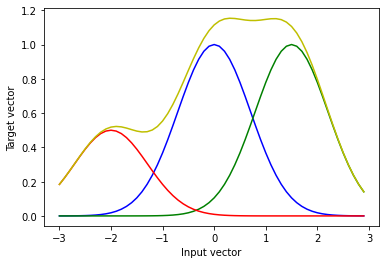

In [80]:
# plot rbf_1 to rbf_4 in a plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, a1, 'b')
ax.plot(x1, a2, 'g')
ax.plot(x1, a3, 'r')
ax.plot(x1, a4, 'y')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [82]:
# Design a RBF network
# NEWRB function
from sklearn.neural_network import MLPRegressor

net = MLPRegressor(hidden_layer_sizes=(8,), activation='logistic',
                     solver='lbfgs', alpha=0.0001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001,
                        power_t=0.5, max_iter=1000, shuffle=True,
                        random_state=None, tol=0.0001, verbose=False,
                        warm_start=False, momentum=0.9, nesterovs_momentum=True,
                        early_stopping=False, validation_fraction=0.1,
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08)
net

MLPRegressor(activation='logistic', hidden_layer_sizes=(8,), max_iter=1000,
             solver='lbfgs')